<a href="https://colab.research.google.com/github/lecuevasp/Portafolio/blob/v2/pib_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uso de la api de Banco Mundial


La versión `1.0.12` del Paquete wbgapi de Python Ya está disponible. Este paquete lleva casi un año en el Índice de Paquetes de Python y la última versión incorpora varias nuevas funciones para la exploración y la búsqueda en bases de datos sean sencillas e interactivas.



In [3]:
# Instalar biblioteca
%pip install wbgapi

In [4]:
# Importar bibiotecas
import wbgapi as wb
from google.colab import drive
from datetime import datetime
import pandas as pd
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2')

import my_func as fn

Mounted at /content/drive


Usando la api del Banco Mundial es posible acceder a estadísticas diversas sobre desarrollo económico. A continuación extraeremos información de 65 indicadores económicos

In [5]:
# Indicadores a consultar
dicc_indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [42]:
# Descarga de datos
paises_wb_raw = fn.descargar_en_chunks(indicadores=dicc_indicadores_wb, años = 2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

## Análisis exploratorio de datos

In [43]:
paises_wb_raw.tail(5)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
261,CEB,Central Europe and the Baltics,4.224592e+12,45.669942,49096984.0,0.103859,100175859.0,51635336.0,51.544691,48540523.0,...,80.939987,56.712559,81.624679,77.896784,74.354344,NaN,NaN,NaN,NaN,NaN
262,CSS,Caribbean small states,1.333323e+11,43.965332,1919128.0,0.501131,4519904.0,2293907.0,50.751230,2225997.0,...,NaN,NaN,76.456921,73.171645,69.986624,NaN,NaN,NaN,NaN,NaN
263,ARB,Arab World,8.076341e+12,19.141318,132483437.0,2.255866,482105978.0,232702770.0,48.267971,249403208.0,...,34.757931,31.807100,74.418910,72.444678,70.619437,NaN,NaN,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.482181e+12,46.355771,212022202.0,2.386204,509398589.0,252899429.0,49.646669,256499160.0,...,NaN,NaN,59.997102,58.855722,57.752356,NaN,NaN,NaN,NaN,38.1
265,AFE,Africa Eastern and Southern,2.963096e+12,47.278110,288482369.0,2.520818,750503764.0,379025748.0,50.502844,371478016.0,...,NaN,NaN,67.914779,65.146291,62.395547,NaN,NaN,NaN,NaN,32.4


Al revisar los primeros y últimos registros se observa que la extracción de datos contiene datos de paises y de áreas geográficas. Por lo tanto se procede a la limpieza de datos

In [44]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [45]:
#Seleccionar solamente paises.
paises_wb_raw = paises_wb_raw[paises_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

Una vez seleccionado solamente los paises procederemos al análisis exploratorio de los datos.

In [46]:
paises_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  197 non-null    object 
 1   Country                  197 non-null    object 
 2   NY.GDP.MKTP.PP.KD        197 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              197 non-null    float64
 6   SP.POP.TOTL              197 non-null    float64
 7   SP.POP.TOTL.FE.IN        197 non-null    float64
 8   SP.POP.TOTL.FE.ZS        197 non-null    float64
 9   SP.POP.TOTL.MA.IN        197 non-null    float64
 10  SP.POP.TOTL.MA.ZS        197 non-null    float64
 11  SP.RUR.TOTL              196 non-null    float64
 12  SP.RUR.TOTL.ZG           188 non-null    float64
 13  SP.RUR.TOTL.ZS           196 non-null    float64
 14  SP.URB.GROW              1

Existen variables con un alto volumnen de datos faltantes. Usaremos la siguiente regla para el tratamiento de los mismos:
- Si `NaN` > 10% Se procede a eliminar la variable.
- Si `NaN` < 10% Se procede a imputar datos.

In [47]:
# Condición booleana
mask_bool = paises_wb_raw.isna().mean()>0.10
# Selección columnas nulas
drop_columns = list(paises_wb_raw.isna().mean()[mask_bool].index)
# Eliminar columnas con alto porcentaje de nulos
paises_wb = paises_wb_raw.drop(columns = drop_columns)

A continuación revisaremos la cantidad de datos de nuestro DataFrame

In [48]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contienen registros nulos bajo el 15%')

El dataFrame contiene 197 filas y 27 columnas, de las cuales 15 contienen registros nulos bajo el 15%


## Imputación de datos

Se realizará a modo de prueba una imputación paramétrica a fin de aplicar algoritmo de reducción de dimensionalidad

In [59]:
# Guardar como indice la columna Country
paises_wb.index = paises_wb['Country']

In [60]:
# Eliminar columnas de texto
paises_wb = paises_wb.drop(columns = ['country','Country'])

In [61]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = simple.fit_transform(paises_wb)
paises_wb = pd.DataFrame(imputer, columns = paises_wb.columns)

In [63]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contienen registros.')

El dataFrame contiene 197 filas y 25 columnas, de las cuales 0 contienen registros.


In [81]:
paises_wb.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,...,BX.KLT.DINV.WD.GD.ZS,GE.EST,NV.IND.TOTL.CD,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN
0,5.624918e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,11027277.0,1.496477,67.483,...,1.583455,-1.170335,9.266224e+09,1.407335e+10,2.198816e+10,3.339515e+10,0.756300,65.013,62.775,60.226
1,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11121516.0,1.730151,53.665,...,0.311507,-0.658970,9.682008e+09,1.956929e+11,1.566890e+10,3.167001e+11,1.457500,68.673,66.349,63.936
2,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,1158063.0,1.103502,22.418,...,0.580098,-1.209557,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,16.837712,71.502,65.170,59.691
3,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,60733147.0,-0.501440,60.520,...,4.264071,0.126467,1.630505e+11,3.878535e+15,1.834968e+11,4.364896e+15,49.319000,79.264,74.588,69.877
4,9.991622e+08,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,237180.0,2.109109,74.024,...,0.822910,-0.568605,1.483189e+11,3.655149e+14,3.645983e+11,4.802635e+14,0.001000,73.927,71.477,69.445


In [82]:
y = paises_wb['NY.GDP.MKTP.PP.KD']
X = paises_wb.drop(columns='NY.GDP.MKTP.PP.KD')

## Reducción de Dimensionalidad

- En que consiste la reducción de dimensionalidad

In [64]:
# Importar biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2

In [92]:
# Escalar datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

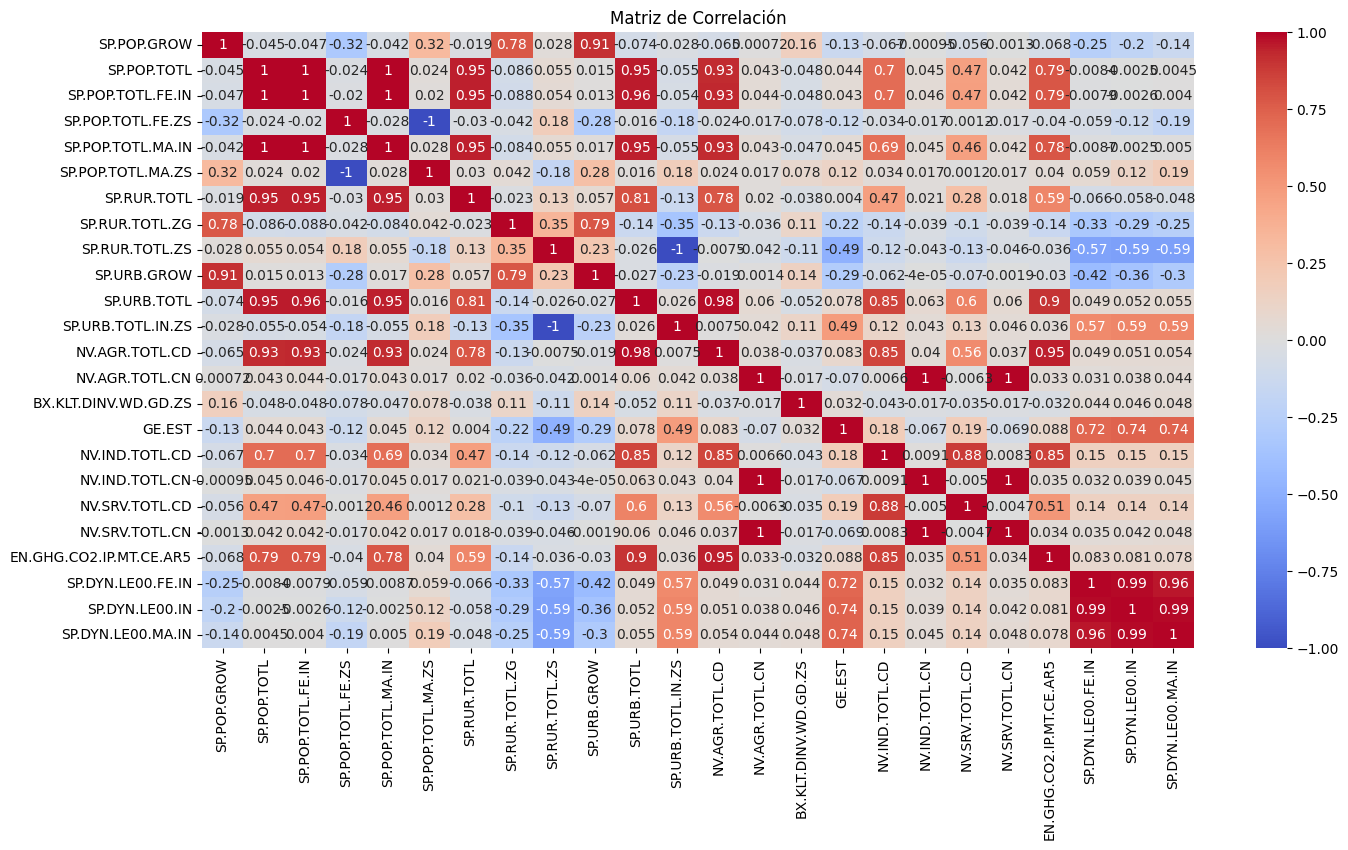

In [93]:
corr = X_std.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


**PCA usando SKLearn**

In [94]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

pca.explained_variance_ratio_


array([3.10513293e-01, 2.12378415e-01, 1.25469644e-01, 1.19107092e-01,
       6.10398543e-02, 4.77577306e-02, 4.30888894e-02, 3.63242735e-02,
       1.78872811e-02, 1.44863007e-02, 6.82224012e-03, 2.48199439e-03,
       1.10887998e-03, 9.38307236e-04, 3.56745609e-04, 1.99506035e-04,
       1.91885953e-05, 8.71606688e-06, 4.94922285e-06, 3.75061324e-06,
       2.94849612e-06, 1.21869303e-30, 7.39276591e-34, 4.42492735e-34])

In [86]:
np.sum([3.10513293e-01, 2.12378415e-01, 1.25469644e-01, 1.19107092e-01,
       6.10398543e-02])

np.float64(0.8285082983000001)

In [95]:
# Seleccionar 5 componentes
pca_5 = PCA(n_components=5)
X_std_pca = pca_5.fit_transform(X_std)

X_std_pca = pd.DataFrame(X_std_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'])
X_std_pca.head()


,CP1,CP2,CP3,CP4,CP5
0,-1.033409,-3.404570,-0.217140,-1.008690,-0.353097
1,-0.884037,-2.562731,0.087278,0.700855,-0.584654
2,-0.724580,-1.614250,0.239989,0.420674,-0.115606
3,0.913208,-0.552952,1.275756,-0.903786,-0.247103
4,-0.809347,-1.989778,0.165450,0.582093,-0.461104


In [96]:
# Matriz de correlación de las componentes
X_std_pca.corr()

,CP1,CP2,CP3,CP4,CP5
CP1,1.000000e+00,5.486416e-18,2.211283e-17,9.984916e-17,1.603296e-16
CP2,5.486416e-18,1.000000e+00,6.077640e-17,3.661512e-17,-7.321485e-17
CP3,2.211283e-17,6.077640e-17,1.000000e+00,1.849183e-16,1.315282e-16
CP4,9.984916e-17,3.661512e-17,1.849183e-16,1.000000e+00,-4.572946e-16
CP5,1.603296e-16,-7.321485e-17,1.315282e-16,-4.572946e-16,1.000000e+00


In [97]:
X_std_pca

,CP1,CP2,CP3,CP4,CP5
0,-1.033409,-3.404570,-0.217140,-1.008690,-0.353097
1,-0.884037,-2.562731,0.087278,0.700855,-0.584654
2,-0.724580,-1.614250,0.239989,0.420674,-0.115606
3,0.913208,-0.552952,1.275756,-0.903786,-0.247103
4,-0.809347,-1.989778,0.165450,0.582093,-0.461104
...,...,...,...,...,...
192,-0.622089,-2.292999,0.166918,0.786940,-0.351209
193,-0.310939,3.037094,-0.051342,1.426162,-0.984671
194,0.117350,0.662372,0.007982,0.518673,0.330234
195,-0.261088,2.251092,-0.528687,-1.667530,0.972313
